BIOS 512
Homework 6
Bella Williams

Question 1

In [2]:
invisible({
suppressPackageStartupMessages(library(tidyverse))

dialogs <- read_csv(
  "https://raw.githubusercontent.com/Vincent-Toups/bios512/fcbc65a2696c7cff80d0f6ed1dd5c97abf0ef800/effective-visualization/source_data/tng.csv",
  show_col_types = FALSE
)

dialogs %>% group_by(character) %>% tally() %>% arrange(desc(n))
dialogs %>% 
  mutate(dialog_length=str_length(dialog)) %>% 
  group_by(character) %>% 
  summarize(mean_dialog_length = mean(dialog_length)) %>% 
  arrange(desc(mean_dialog_length))

dialogs_fixed <- dialogs %>%
  mutate(
    character = str_replace_all(character, "'S.*$", ""),
    character = str_replace_all(character, " VOICE", ""),
    character = str_replace_all(character, "\\.", ""),
    character = str_replace_all(character, "'", ""),
    character = str_replace_all(character, "S COM", ""),
    character = str_replace_all(character, " COM", ""),

    dialog_length = str_length(dialog)
  ) %>%

  filter(character %in% unlist(str_split("PICARD RIKER DATA TROI BEVERLY WORF WESLEY GEORDI", " ")))

dialogs_fixed %>% 
  group_by(character) %>% 
  summarize(
    mean_dialog_length = mean(dialog_length), 
    std_dialog_length=sd(dialog_length)
  ) %>% 
  arrange(desc(mean_dialog_length))

dialog_len_per_ep <- dialogs_fixed %>% 
    group_by(character, episode_number) %>% 
    summarize(
        mean_dialog_length = mean(dialog_length), 
        std_dialog_length = sd(dialog_length),
        dialog_count = n(),
        .groups = "drop"
    ) %>% 
    arrange(desc(mean_dialog_length))

ggplot(dialog_len_per_ep, aes(dialog_count, mean_dialog_length)) + 
  geom_point(aes(color=character)) + 
  facet_wrap(~character)

dialog_len_per_ep

ggplot(dialogs_fixed) + 
  geom_density(aes(x=dialog_length))

for_factor <- dialog_len_per_ep %>% 
  group_by(character) %>% 
  summarise(m=mean(mean_dialog_length)) %>% 
  arrange(desc(m))
  
ggplot(dialog_len_per_ep, aes(factor(character,for_factor$character), mean_dialog_length)) + 
  geom_boxplot()

})


Question 1

PICARD speaks frequently and gives long, substantial monologues. It is likely that he is a primary character. DATA, WORF, and RIKER speak frequently but in shorter sections. It is likely their dialogue is more functional. BEVERLY, GEORFI, and TROI speak less often but for longer lengths of time. Perhaps they are engaging in deeper discussion with PICARD to help drive the plot. WESLEY seems to be a minor character as her has both a low number of lines and short average length of lines.

Question 2

A)

In [3]:
beverly_dialogs <- dialogs_fixed %>%
    filter(
        character == "BEVERLY",
        episode_number >= 102 & episode_number <= 126 | # Season 1 range
        episode_number >= 149 & episode_number <= 174   # Season 3 range
    )

beverly_dialogs_with_season <- beverly_dialogs %>%
    mutate(
        season = case_when(
            episode_number >= 102 & episode_number <= 126 ~ "Season 1",
            episode_number >= 149 & episode_number <= 174 ~ "Season 3",
            TRUE ~ NA_character_ # Should not happen based on the filter
        )
    )

beverly_ep_stats <- beverly_dialogs_with_season %>%
    group_by(season, episode_number) %>%
    summarize(
        mean_dialog_length_per_ep = mean(dialog_length),
        dialog_count_per_ep = n(),
        .groups = "drop"
    )

beverly_season_comparison <- beverly_ep_stats %>%
    group_by(season) %>%
    summarize(
        mean_dialog_length_overall = mean(mean_dialog_length_per_ep),
        mean_dialog_count_overall = mean(dialog_count_per_ep),
        .groups = "drop"
    )

beverly_season_comparison

season,mean_dialog_length_overall,mean_dialog_count_overall
<chr>,<dbl>,<dbl>
Season 1,56.48460,25.40
Season 3,67.04817,19.64


B)
The table shows that BEVERLY's mean dialog length increased from 56.5 to 67.0. Longer dialogue is typically given to primary/complex characters. However, her mean dialog count per episode decreased from 25.4 to 19.6. This indicates that she is speaking less frequently overall. When observing these two data points together, one can expect that the lines spoken are more impactful and authoritative. This type of dialogue is often given to "male" roles in this genre. The increase from season 1 to season 3 aligns with BEVERLY's perception of becoming a more central character, likely driving the plot/narrative. 

Question 3

A)

In [4]:
stop_words <- c(
  "i","me","my","myself","we","our","ours","ourselves","you","your","yours","yourself",
  "yourselves","he","him","his","himself","she","her","hers","herself","it","its","itself",
  "they","them","their","theirs","themselves","what","which","who","whom","this","that",
  "these","those","am","is","are","was","were","be","been","being","have","has","had",
  "having","do","does","did","doing","a","an","the","and","but","if","or","because","as",
  "until","while","of","at","by","for","with","about","against","between","into","through",
  "during","before","after","above","below","to","from","up","down","in","out","on","off",
  "over","under","again","further","then","once","here","there","when","where","why","how",
  "all","any","both","each","few","more","most","other","some","such","no","nor","not",
  "only","own","same","so","than","too","very","s","t","can","will","just","don","should","now"
)

tokens <- dialogs_fixed %>%
  mutate(word_list = str_split(dialog, "\\s+")) %>%

  unnest(word_list) %>%

  mutate(
    word = str_remove_all(word_list, "[[:punct:]]"),
    word = str_to_lower(word)                      
  ) %>%

  filter(word != "", !word %in% stop_words)

B)

In [5]:
vocabulary_richness <- tokens %>%
  group_by(character) %>%
  summarize(
    total_words = n(),                      
    unique_words = n_distinct(word),        
    vocabulary_richness = unique_words / total_words 
  ) %>%
  arrange(desc(vocabulary_richness))         

vocabulary_richness

head(tokens)

character,total_words,unique_words,vocabulary_richness
<chr>,<int>,<int>,<dbl>
WESLEY,7601,2291,0.3014077
WORF,18820,4318,0.2294368
TROI,19450,4187,0.2152699
BEVERLY,22900,4875,0.2128821
DATA,45462,8593,0.1890150
GEORDI,31978,5465,0.1708987
RIKER,41827,6458,0.1543979
PICARD,79214,9272,0.1170500


episode_number,character,dialog,dialog_length,word_list,word
<dbl>,<chr>,<chr>,<int>,<chr>,<chr>
102,PICARD,"Captain's log, stardate 42353.7. Our destination is planet Cygnus IV, beyond which lies the great unexplored mass of the galaxy.",128,Captain's,captains
102,PICARD,"Captain's log, stardate 42353.7. Our destination is planet Cygnus IV, beyond which lies the great unexplored mass of the galaxy.",128,"log,",log
102,PICARD,"Captain's log, stardate 42353.7. Our destination is planet Cygnus IV, beyond which lies the great unexplored mass of the galaxy.",128,stardate,stardate
102,PICARD,"Captain's log, stardate 42353.7. Our destination is planet Cygnus IV, beyond which lies the great unexplored mass of the galaxy.",128,42353.7.,423537
102,PICARD,"Captain's log, stardate 42353.7. Our destination is planet Cygnus IV, beyond which lies the great unexplored mass of the galaxy.",128,destination,destination
102,PICARD,"Captain's log, stardate 42353.7. Our destination is planet Cygnus IV, beyond which lies the great unexplored mass of the galaxy.",128,planet,planet


C)

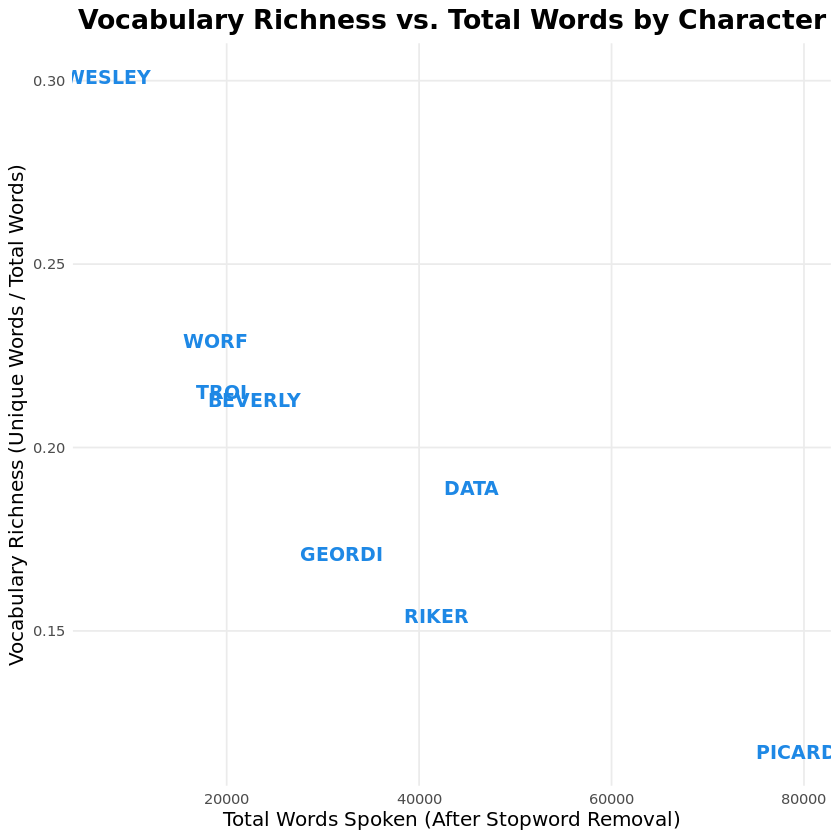

In [6]:
library(ggplot2)

vocabulary_richness <- data.frame(
  character = c("WESLEY", "WORF", "TROI", "BEVERLY", "DATA", "GEORDI", "RIKER", "PICARD"),
  total_words = c(7601L, 18820L, 19450L, 22900L, 45462L, 31978L, 41827L, 79214L),
  unique_words = c(2291L, 4318L, 4187L, 4875L, 8593L, 5465L, 6458L, 9272L),
  vocabulary_richness = c(0.301, 0.229, 0.215, 0.213, 0.189, 0.171, 0.154, 0.117)
)

ggplot(vocabulary_richness, aes(x = total_words, y = vocabulary_richness)) +

  geom_text(aes(label = character), 
            size = 4, 
            color = "#1E88E5", 
            fontface = "bold") +

  labs(
    title = "Vocabulary Richness vs. Total Words by Character",
    x = "Total Words Spoken (After Stopword Removal)",
    y = "Vocabulary Richness (Unique Words / Total Words)"
  ) +

  theme_minimal() +

  theme(
    legend.position = "none",
    plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
    axis.title = element_text(size = 12),
    panel.grid.minor = element_blank()
  )

D)
On the plot we see Total Words Spoken on the x axis and Vocabulary Richness on the y axis. WESLEY, WORF, TROI, and BEVERLY have relatively low total word counts (under 20,000) but high vocabulary richness (0.30). WESLEY emerges as an extreme outlier of the group. It is likely that when these characters speak, their dialogue is less repetitive and extremely concentrated. PICARD, on the other hand, sits at the other extreme with by far the largest total word count (80,000), but lowest vocabulary richness (under 0.15). I expect much of his dialogue is repreated phrases, which would drive down his unique word-to-total-word ratio. DATA, RIKER, and GEORDI lie in the middle of the plot. It is likely that their mid-tier word count contains a more balanced mix of unique jargon and commonly repeated phrases.

Question 4

In [7]:
library(tidyverse)

start_of_season_4 <- 175

wesley_post_s3_dialogs <- dialogs_fixed %>%
    filter(
        character == "WESLEY",
        episode_number >= start_of_season_4
    )

wesley_dialog_count_post_s3 <- wesley_post_s3_dialogs %>%

    group_by(episode_number) %>%
    summarize(
        dialog_count = n(),
        .groups = "drop"
    )

all_post_s3_episodes <- data.frame(episode_number = start_of_season_4:276)

wesley_full_ep_list <- all_post_s3_episodes %>%
    left_join(wesley_dialog_count_post_s3, by = "episode_number") %>%

    mutate(dialog_count = replace_na(dialog_count, 0)) %>%

    filter(episode_number <= 276) 

print(as.data.frame(wesley_full_ep_list))

    episode_number dialog_count
1              175           18
2              176            6
3              177            9
4              178            6
5              179           38
6              180            0
7              181            2
8              182            0
9              183           94
10             184            0
11             185            0
12             186            0
13             187            0
14             188            0
15             189            0
16             190            0
17             191            0
18             192            0
19             193            0
20             194            0
21             195            0
22             196            0
23             197            0
24             198            0
25             199            0
26             200            0
27             201            0
28             202            0
29             203            0
30             204            0
31      

Episode 183

B) Episode 206

C)

In [9]:
library(tidyverse)

start_of_season_4 <- 175

wesley_post_s3_dialogs <- dialogs_fixed %>%
    filter(
        character == "WESLEY",
        episode_number >= start_of_season_4
    )

wesley_dialog_count_post_s3 <- wesley_post_s3_dialogs %>%

    group_by(episode_number) %>%
    summarize(
        dialog_count = n(),
        .groups = "drop"
    )

all_post_s3_episodes <- data.frame(episode_number = start_of_season_4:276)

wesley_full_ep_list <- all_post_s3_episodes %>%
    left_join(wesley_dialog_count_post_s3, by = "episode_number") %>%

    mutate(dialog_count = replace_na(dialog_count, 0))

wesley_cameo_list <- wesley_full_ep_list %>%
    filter(episode_number > 183, dialog_count > 0)

print("--- Wesley Cameo Episodes (Recap) ---")
print(as.data.frame(wesley_cameo_list))
print("-------------------------------------")

wesley_last_main_line <- dialogs_fixed %>%
    filter(character == "WESLEY", episode_number == 183) %>%
    slice_tail(n = 1) %>%
    select(episode_number, dialog)

print("--- Wesley's Last Main Cast Line (Episode 183) ---")
print(as.data.frame(wesley_last_main_line))
print("--------------------------------------------------")

wesley_last_ever_line <- dialogs_fixed %>%
    filter(character == "WESLEY") %>%
    slice_tail(n = 1) %>%
    select(episode_number, dialog)

print("--- Wesley's Last Line EVER (Final Cameo) ---")
print(as.data.frame(wesley_last_ever_line))
print("---------------------------------------------")

[1] "--- Wesley Cameo Episodes (Recap) ---"
  episode_number dialog_count
1            206          131
2            219           71
3            263           18
4            272           97
[1] "-------------------------------------"
[1] "--- Wesley's Last Main Cast Line (Episode 183) ---"
  episode_number      dialog
1            183 I can walk.
[1] "--------------------------------------------------"
[1] "--- Wesley's Last Line EVER (Final Cameo) ---"
  episode_number         dialog
1            272 Good-bye, Mom.
[1] "---------------------------------------------"


Question 5

[1] "--- Wesley Cameo Episodes (Recap) ---"
  episode_number dialog_count
1            206          131
2            219           71
3            263           18
4            272           97
[1] "-------------------------------------"
[1] "--- Wesley's Last Main Cast Line (Episode 183) ---"
  episode_number      dialog
1            183 I can walk.
[1] "--------------------------------------------------"
[1] "--- Wesley's Last Line EVER (Final Cameo) ---"
  episode_number         dialog
1            272 Good-bye, Mom.
[1] "---------------------------------------------"
[1] "--- Mean Dialog Length Heatmap ---"
[1] "----------------------------------"


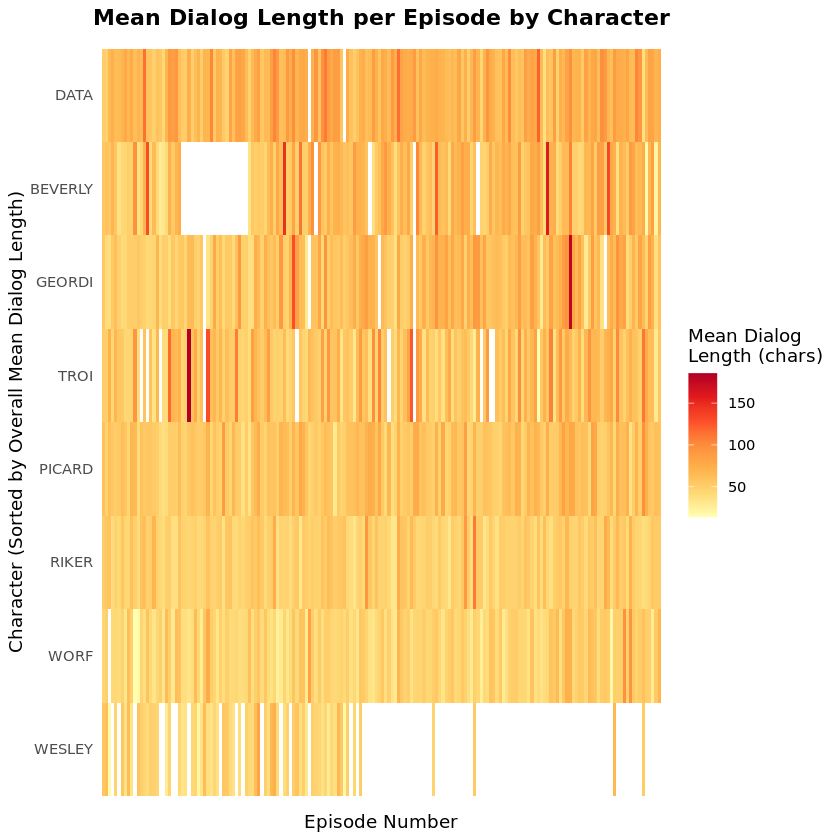

In [11]:
library(tidyverse)

start_of_season_4 <- 175

wesley_post_s3_dialogs <- dialogs_fixed %>%
    filter(
        character == "WESLEY",
        episode_number >= start_of_season_4
    )

wesley_dialog_count_post_s3 <- wesley_post_s3_dialogs %>%

    group_by(episode_number) %>%
    summarize(
        dialog_count = n(),
        .groups = "drop"
    )

all_post_s3_episodes <- data.frame(episode_number = start_of_season_4:276)

wesley_full_ep_list <- all_post_s3_episodes %>%
    left_join(wesley_dialog_count_post_s3, by = "episode_number") %>%

    mutate(dialog_count = replace_na(dialog_count, 0))

wesley_cameo_list <- wesley_full_ep_list %>%
    filter(episode_number > 183, dialog_count > 0)

print("--- Wesley Cameo Episodes (Recap) ---")
print(as.data.frame(wesley_cameo_list))
print("-------------------------------------")

wesley_last_main_line <- dialogs_fixed %>%
    filter(character == "WESLEY", episode_number == 183) %>%
    slice_tail(n = 1) %>%
    select(episode_number, dialog)

print("--- Wesley's Last Main Cast Line (Episode 183) ---")
print(as.data.frame(wesley_last_main_line))
print("--------------------------------------------------")

wesley_last_ever_line <- dialogs_fixed %>%
    filter(character == "WESLEY") %>%
    slice_tail(n = 1) %>%
    select(episode_number, dialog)

print("--- Wesley's Last Line EVER (Final Cameo) ---")
print(as.data.frame(wesley_last_ever_line))
print("---------------------------------------------")

dialog_len_per_ep <- dialogs_fixed %>% 
    group_by(character, episode_number) %>% 
    summarize(mean_dialog_length = mean(dialog_length), .groups = "drop")

character_order <- dialog_len_per_ep %>%
    group_by(character) %>%
    summarize(overall_mean = mean(mean_dialog_length)) %>%
    arrange(overall_mean) %>%
    pull(character)

dialog_len_per_ep <- dialog_len_per_ep %>%
    mutate(character = factor(character, levels = character_order))

heatmap_plot <- ggplot(dialog_len_per_ep, 
                       aes(x = as.factor(episode_number), 
                           y = character, 
                           fill = mean_dialog_length)) +
    geom_tile() +

    scale_fill_distiller(palette = "YlOrRd", direction = 1, name = "Mean Dialog\nLength (chars)") + 

    labs(
        title = "Mean Dialog Length per Episode by Character",
        x = "Episode Number",
        y = "Character (Sorted by Overall Mean Dialog Length)"
    ) +

    theme_minimal() +
    theme(
        axis.text.x = element_blank(), 
        axis.ticks.x = element_blank(),
        panel.grid = element_blank(), 
        plot.title = element_text(hjust = 0.5, face = "bold")
    )

print("--- Mean Dialog Length Heatmap ---")
print(heatmap_plot)
print("----------------------------------")